In [1]:
#@title Imports and Library Setup
import numpy as np
import pandas as pd
from google.colab import drive
import math
import matplotlib.pyplot as plt


In [2]:
#@title Helper Function: Exponential Kernel
def fun_exp(x):
  return math.exp(-x)


In [3]:
#@title Parzen Window Density Estimator
def Parsen(x1, x2, h, flag):
  x = np.array([x1, x2])
  points = listPointsClasses[flag-1]

  pdf = (((1/(np.sqrt(2*math.pi)*h))*(((x - points.iloc[:])**2).sum(axis=1)/(2*h**2)).apply(fun_exp))/h**2).sum()/100

  return pdf


In [4]:
#@title k-Nearest Neighbour Density Estimator
def kNN(x1, x2, k, flag):
  x = np.array([x1, x2])
  points = listPointsClasses[flag-1]

  ArrDist = np.array((x-points)**2).sum(axis=1)

  r = np.sort(np.partition(ArrDist, k-1)[:k])[k-1]
  V = np.pi*r**2
  N = ArrDist.shape[0]

  pdf = k/(N*V)

  return pdf


In [5]:
#@title Bayesian Classifier Using Density Estimates
def classify(x1,x2,param,flag):

  if flag == 1:
    p1 = Parsen(x1, x2, param, 1)
    p2 = Parsen(x1, x2, param, 2)
    p3 = Parsen(x1, x2, param, 3)
  else:
    p1 = kNN(x1, x2, param, 1)
    p2 = kNN(x1, x2, param, 2)
    p3 = kNN(x1, x2, param, 3)

  return np.argmax([p1,p2,p3]) + 1


In [7]:
#@title Load Dataset and Preprocess Classes

# ===== Original data loading (kept for reference) =====
# data = pd.read_csv('/content/drive/MyDrive/Data_ex1.txt')
# data.loc[299] = [float(data.columns[0]), float(data.columns[1]), int(data.columns[2])]
# data.columns = ['x1','x2','class']

# ===== New synthetic dataset (replacing missing file) =====
np.random.seed(42)

N = 100  # samples per class

# Class 1
c1_x1 = np.random.normal(loc=0, scale=0.8, size=N)
c1_x2 = np.random.normal(loc=0, scale=0.8, size=N)
c1 = np.column_stack((c1_x1, c1_x2, np.ones(N)))

# Class 2
c2_x1 = np.random.normal(loc=4, scale=0.8, size=N)
c2_x2 = np.random.normal(loc=4, scale=0.8, size=N)
c2 = np.column_stack((c2_x1, c2_x2, 2*np.ones(N)))

# Class 3
c3_x1 = np.random.normal(loc=0, scale=0.8, size=N)
c3_x2 = np.random.normal(loc=4, scale=0.8, size=N)
c3 = np.column_stack((c3_x1, c3_x2, 3*np.ones(N)))

# Combine all classes
data = pd.DataFrame(
    np.vstack((c1, c2, c3)),
    columns=['x1', 'x2', 'class']
)

class1 = data[data.iloc[:,2] == 1].drop('class', axis = 1)
class2 = data[data.iloc[:,2] == 2].drop('class', axis = 1)
class3 = data[data.iloc[:,2] == 3].drop('class', axis = 1)

listPointsClasses = [class1, class2, class3]


In [8]:
#@title Define Feature Space Grid
min_X = min([min(class1.iloc[:,0]), min(class2.iloc[:,0]), min(class3.iloc[:,0])])
max_X = max([max(class1.iloc[:,0]), max(class2.iloc[:,0]), max(class3.iloc[:,0])])
min_Y = min([min(class1.iloc[:,1]), min(class2.iloc[:,1]), min(class3.iloc[:,1])])
max_Y = max([max(class1.iloc[:,1]), max(class2.iloc[:,1]), max(class3.iloc[:,1])])

x1_values = np.linspace(min_X, max_X, 100)
x2_values = np.linspace(min_Y, max_Y, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)


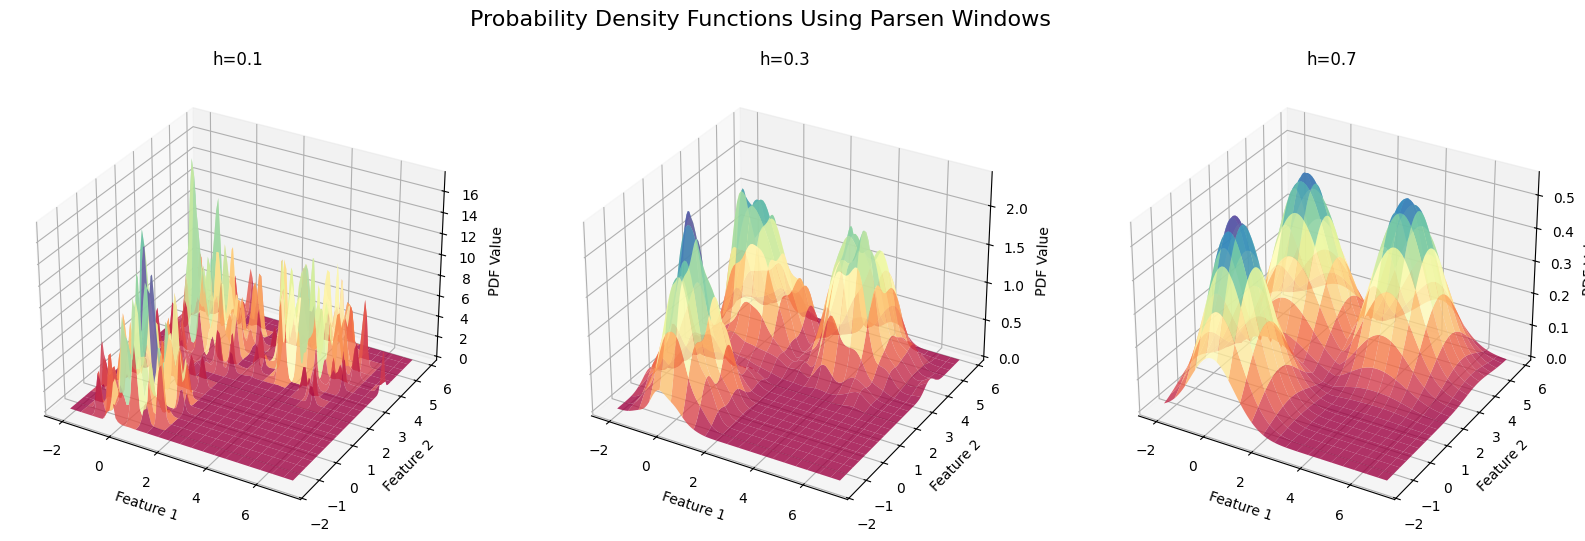

In [9]:
#@title Parzen Window PDF Visualization (Full Dataset)
markSize = 30
fig = plt.figure(figsize=(20, 6))
h = [0.1, 0.3, 0.7]

fig.suptitle('Probability Density Functions Using Parsen Windows', fontsize=16)

for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')

    pdf_values1 = np.array([Parsen(x1, x2, h[i], 1) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])
    pdf_values2 = np.array([Parsen(x1, x2, h[i], 2) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])
    pdf_values3 = np.array([Parsen(x1, x2, h[i], 3) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])

    pdf_values = np.maximum(pdf_values1, np.maximum(pdf_values2, pdf_values3))
    pdf_values = pdf_values.reshape(x1_mesh.shape)

    surface = ax.plot_surface(x1_mesh, x2_mesh, pdf_values, cmap='Spectral', rstride=5, cstride=5, alpha=0.8)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('PDF Value')
    ax.set_title(f'h={h[i]}')


In [10]:
#@title Reduce Dataset Size (75% Less Data)
class1 = data[data.iloc[:,2] == 1].drop('class', axis = 1).iloc[0:25,:]
class2 = data[data.iloc[:,2] == 2].drop('class', axis = 1).iloc[0:25,:]
class3 = data[data.iloc[:,2] == 3].drop('class', axis = 1).iloc[0:25,:]

listPointsClasses = [class1, class2, class3]


In [11]:
#@title Feature Grid for Reduced Dataset
min_X = min([min(class1.iloc[:,0]), min(class2.iloc[:,0]), min(class3.iloc[:,0])])
max_X = max([max(class1.iloc[:,0]), max(class2.iloc[:,0]), max(class3.iloc[:,0])])
min_Y = min([min(class1.iloc[:,1]), min(class2.iloc[:,1]), min(class3.iloc[:,1])])
max_Y = max([max(class1.iloc[:,1]), max(class2.iloc[:,1]), max(class3.iloc[:,1])])

x1_values = np.linspace(min_X, max_X, 100)
x2_values = np.linspace(min_Y, max_Y, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)


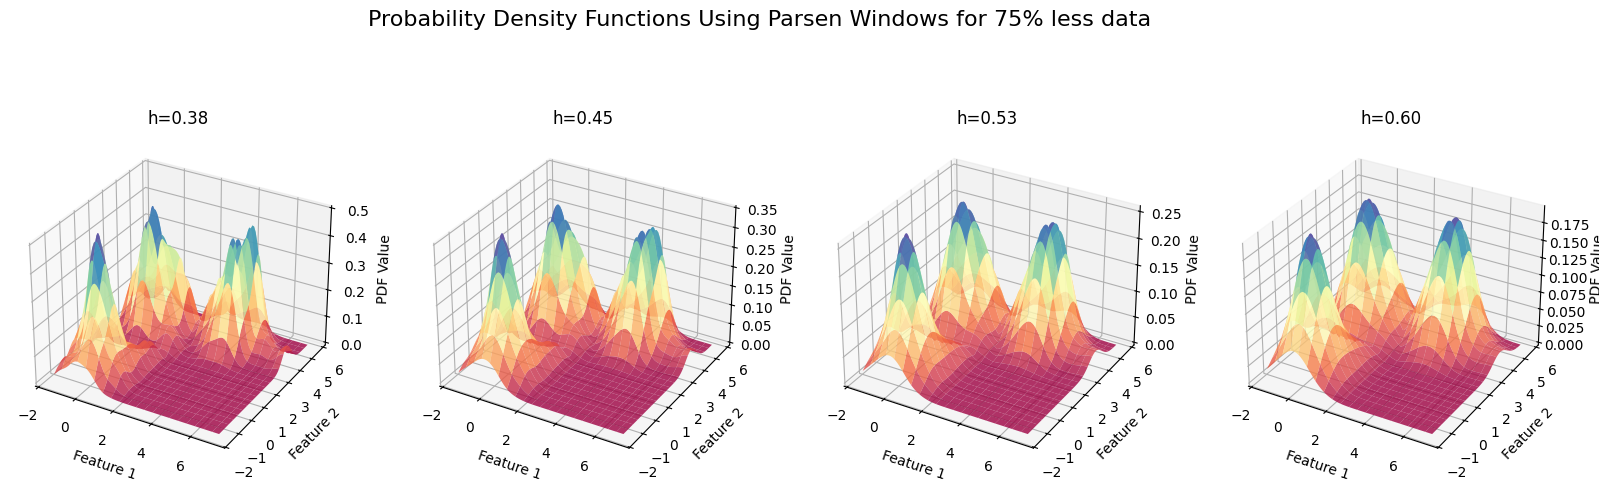

In [12]:
#@title Parzen Window PDF with Reduced Data and Adjusted Bandwidth
markSize = 30
fig = plt.figure(figsize=(20, 6))
fig.suptitle('Probability Density Functions Using Parsen Windows for 75% less data', fontsize=16)

f = [0.25, 0.5, 0.75, 1]*1
h_before = 0.3

for i in range(4):
    h_after = h_before*(1+f[i])
    ax = fig.add_subplot(1, 4, i + 1, projection='3d')

    pdf_values1 = np.array([Parsen(x1, x2, h_after, 1) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])
    pdf_values2 = np.array([Parsen(x1, x2, h_after, 2) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])
    pdf_values3 = np.array([Parsen(x1, x2, h_after, 3) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])

    pdf_values = np.maximum(pdf_values1, np.maximum(pdf_values2, pdf_values3))
    pdf_values = pdf_values.reshape(x1_mesh.shape)

    surface = ax.plot_surface(x1_mesh, x2_mesh, pdf_values, cmap='Spectral', rstride=5, cstride=5, alpha=0.8)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('PDF Value')
    ax.set_title(f'h={h_after:.2f}')


In [13]:
#@title Restore Full Dataset
class1 = data[data.iloc[:,2] == 1].drop('class', axis = 1)
class2 = data[data.iloc[:,2] == 2].drop('class', axis = 1)
class3 = data[data.iloc[:,2] == 3].drop('class', axis = 1)

listPointsClasses = [class1, class2, class3]


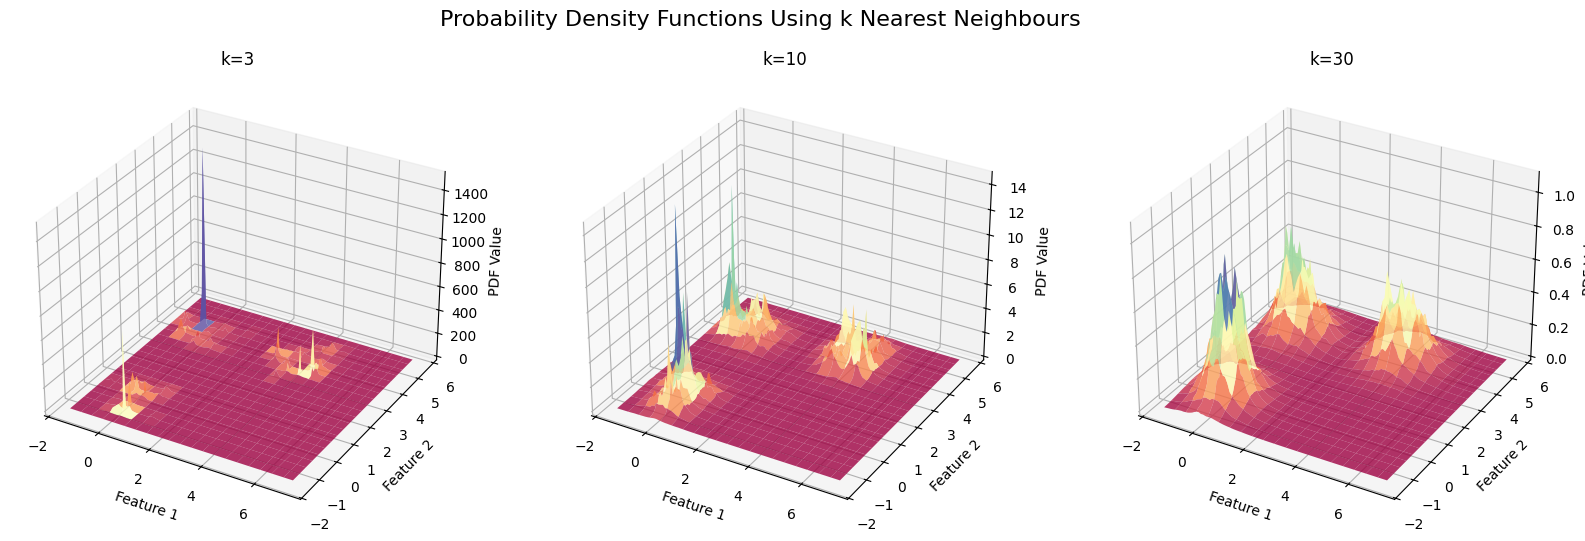

In [14]:
#@title kNN PDF Visualization (Full Dataset)
markSize = 30
fig = plt.figure(figsize=(20, 6))
k = [3, 10, 30]

fig.suptitle('Probability Density Functions Using k Nearest Neighbours', fontsize=16)

for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')

    pdf_values1 = np.array([kNN(x1, x2, k[i], 1) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])
    pdf_values2 = np.array([kNN(x1, x2, k[i], 2) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])
    pdf_values3 = np.array([kNN(x1, x2, k[i], 3) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])

    pdf_values = np.maximum(pdf_values1, np.maximum(pdf_values2, pdf_values3))
    pdf_values = pdf_values.reshape(x1_mesh.shape)

    surface = ax.plot_surface(x1_mesh, x2_mesh, pdf_values, cmap='Spectral', rstride=5, cstride=5, alpha=0.8)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('PDF Value')
    ax.set_title(f'k={k[i]}')


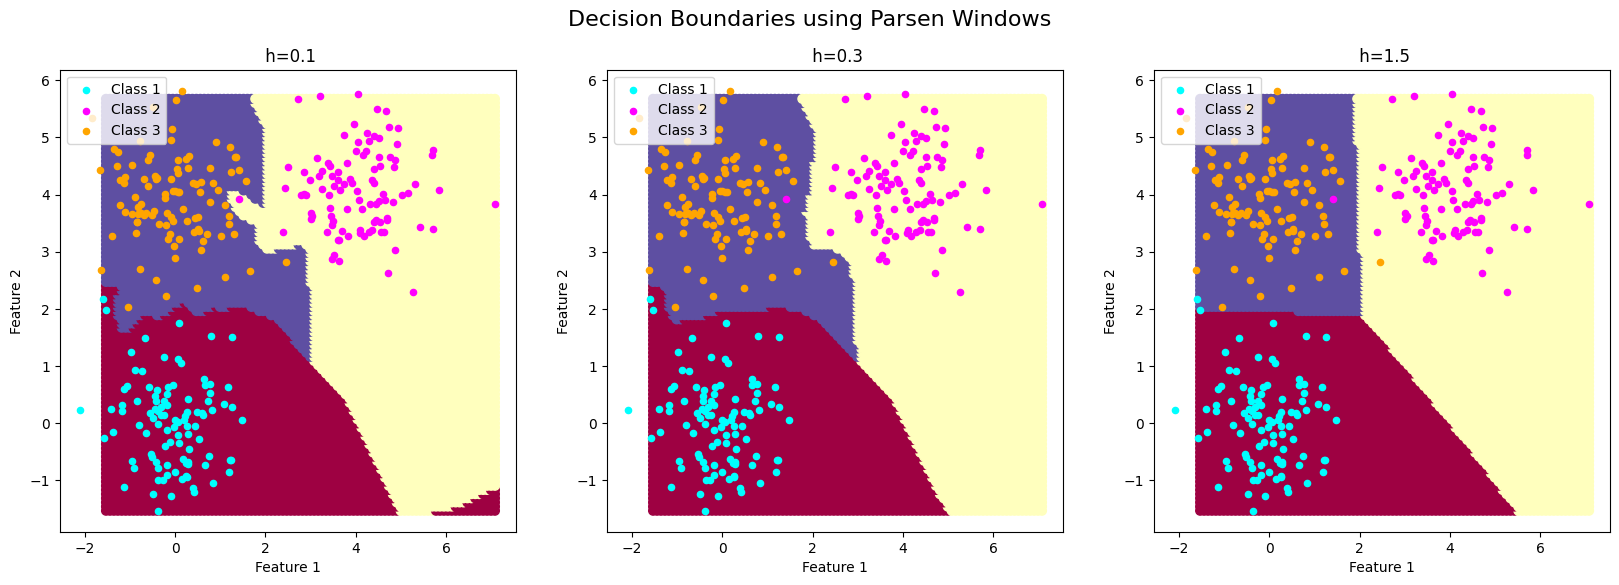

In [15]:
#@title Decision Boundaries Using Parzen Windows
h = [0.1, 0.3, 1.5]
fig, ax = plt.subplots(1, 3, figsize=(20,6 ))

fig.suptitle('Decision Boundaries using Parsen Windows', fontsize=16)

boundaries1 = np.array([classify(x1, x2, h[0], 1) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])
boundaries2 = np.array([classify(x1, x2, h[1], 1) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])
boundaries3 = np.array([classify(x1, x2, h[2], 1) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])

bPars = [boundaries1, boundaries2, boundaries3]

for i in range(0,3):
  ax[i].scatter(x1_mesh, x2_mesh, c = bPars[i], cmap = 'Spectral', s = 40)
  ax[i].scatter(class1.iloc[:,0], class1.iloc[:,1], label='Class 1', marker='o', s = 20, c = 'cyan')
  ax[i].scatter(class2.iloc[:,0], class2.iloc[:,1], label='Class 2', marker='o', s = 20, c = 'magenta')
  ax[i].scatter(class3.iloc[:,0], class3.iloc[:,1], label='Class 3', marker='o', s = 20, c = 'orange')
  ax[i].set_xlabel('Feature 1')
  ax[i].set_ylabel('Feature 2')
  ax[i].legend()
  ax[i].set_title(f' h={h[i]}')


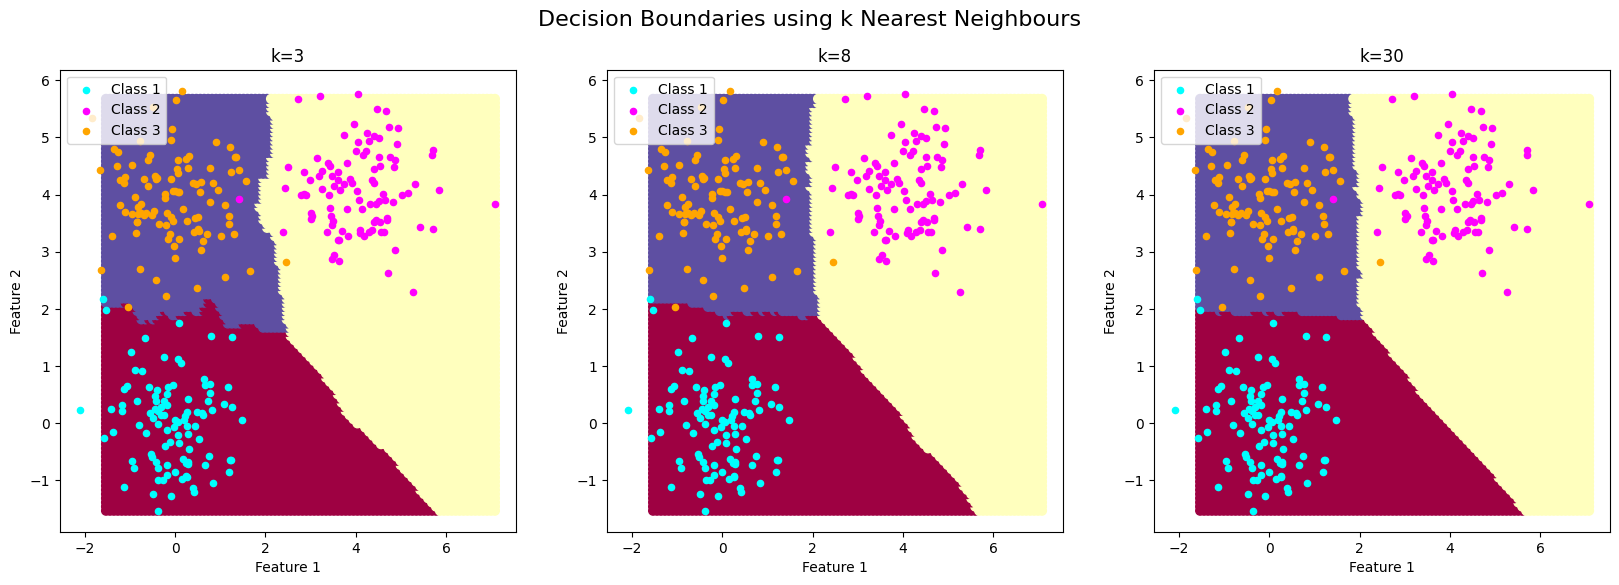

In [16]:
#@title Decision Boundaries Using k Nearest Neighbours
k = [3, 8, 30]
fig, ax = plt.subplots(1, 3, figsize=(20,6 ))

fig.suptitle('Decision Boundaries using k Nearest Neighbours', fontsize=16)

boundaries1 = np.array([classify(x1, x2, k[0], 2) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])
boundaries2 = np.array([classify(x1, x2, k[1], 2) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])
boundaries3 = np.array([classify(x1, x2, k[2], 2) for x1, x2 in zip(x1_mesh.ravel(), x2_mesh.ravel())])

bPars = [boundaries1, boundaries2, boundaries3]

for i in range(0,3):
  ax[i].scatter(x1_mesh, x2_mesh, c = bPars[i], cmap = 'Spectral', s = 40)
  ax[i].scatter(class1.iloc[:,0], class1.iloc[:,1], label='Class 1', marker='o', s = 20, c = 'cyan')
  ax[i].scatter(class2.iloc[:,0], class2.iloc[:,1], label='Class 2', marker='o', s = 20, c = 'magenta')
  ax[i].scatter(class3.iloc[:,0], class3.iloc[:,1], label='Class 3', marker='o', s = 20, c = 'orange')
  ax[i].set_xlabel('Feature 1')
  ax[i].set_ylabel('Feature 2')
  ax[i].legend()
  ax[i].set_title(f'k={k[i]}')
